# The distribution of p-values in a statistical hypothesis test

We calculate the distribution of $p$-values of samples drawn when a null hypothesis is true and when it is false.  


**Statistical hypothesis testing** is method to decide whether to reject or not a hypothesis made on some statistic about a population.  This decision is made by drawing a sample from the population and calculating its $p$-value.

Since the sample is a random variable, so is its $p$-value and thus it has a distribution.  

Under the null hypothesis, this distribution is the uniform distribution function.

We verify this by drawing a large number of samples and calculating the histogram of their $p$-values.


# Reference:  
- [How to interpret a p-value histogram](http://varianceexplained.org/statistics/interpreting-pvalue-histogram) (varianceexplained.org)
---
tags: statistics, p-value distribution, statistical hypothesis tests

# Imports

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Distribution of p-values under null hypothesis (H0)

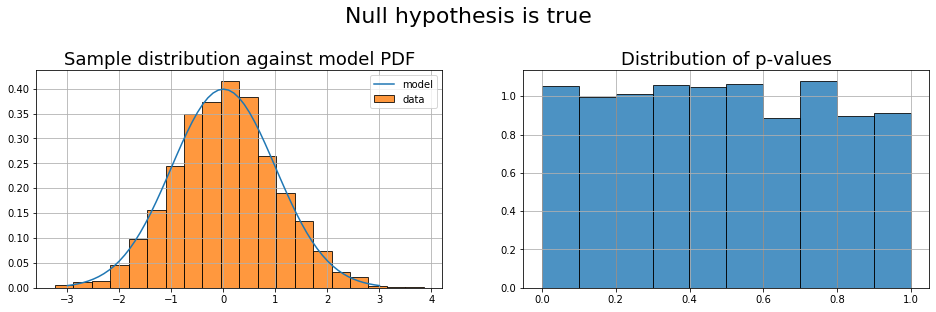

In [2]:
np.random.seed(42)

# Parameters (samples)
n = 2_000
m0 = 0
s0 = 1
m1 = m0
s1 = s0

# Samples
samples = scipy.stats.norm.rvs(loc=m1, scale=s1, size=n)

# p-values
p_values = scipy.stats.norm.sf(samples, loc=m0, scale=s0)

# Model PDF
xh = .1
xmin = m0 - 3
xmax = m0 + 3
x = np.arange(xmin, xmax + xh, xh)
p0 = scipy.stats.norm.pdf(x, loc=m0, scale=s0)


# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(x, p0, label='model')
axs[0].hist(samples, bins=20, label='data', density=True, alpha=.8, edgecolor='k', linewidth=1)
axs[0].set_title("Sample distribution against model PDF", fontsize=18)

axs[0].legend()
axs[0].grid();

axs[1].hist(p_values, density=True, alpha=.8, edgecolor='k', linewidth=1)
axs[1].set_title('Distribution of p-values', fontsize=18)
axs[1].grid();

fig.suptitle("Null hypothesis is true", fontsize=22, y=1.1);

# Distribution of p-values when null hypothesis is false

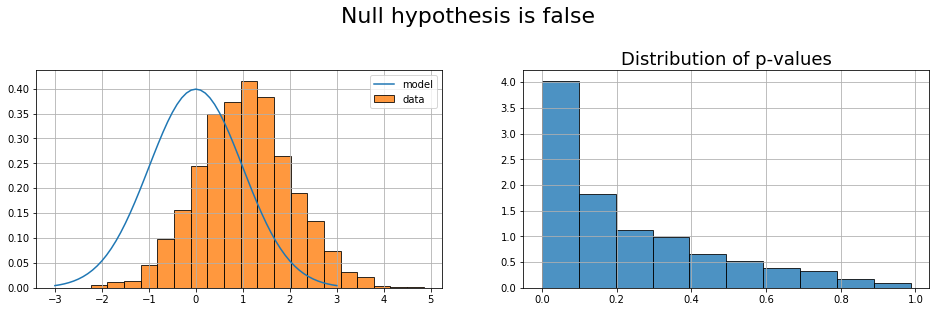

In [3]:
np.random.seed(42)

# Samples
n = 2_000
m0 = 0
s0 = 1
m1 = m0 + 1
s1 = s0
samples = scipy.stats.norm.rvs(loc=m1, scale=s1, size=n)

# p-values
c = scipy.stats.norm.sf(samples, loc=m0, scale=s0)



# Model PDF
xh = .1
xmin = m0 - 3
xmax = m0 + 3
x = np.arange(xmin, xmax + xh, xh)
p0 = scipy.stats.norm.pdf(x, loc=m0, scale=s0)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(x, p0, label='model')
axs[0].hist(samples, bins=20, label='data', density=True, alpha=.8, edgecolor='k', linewidth=1)

axs[0].legend()
axs[0].grid();

bins=10
axs[1].hist(c, density=True, bins=bins, alpha=.8, edgecolor='k', linewidth=1)
axs[1].set_title('Distribution of p-values', fontsize=18)
axs[1].grid();

fig.suptitle("Null hypothesis is false", fontsize=22, y=1.1);

If the distribution function of the underlying sample is known, which led to the rejection of the null hypothesis, then we can calculate the distribution of the p-values:

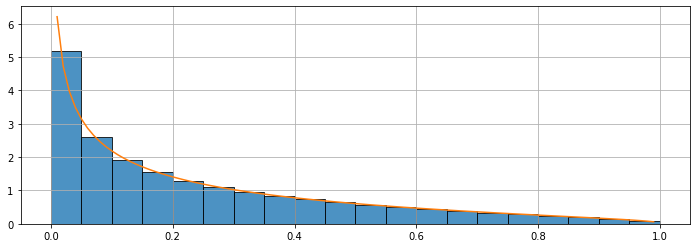

In [4]:
np.random.seed(42)

# Parameters
n = 2_000_000
m0 = 0
s0 = 1
m1 = m0 + 1
s1 = s0

# Samples
samples = scipy.stats.norm.rvs(loc=m1, scale=s1, size=n)

# p-values
p_values = scipy.stats.norm.sf(samples, loc=m0, scale=s0)

#
ph = .01
p_in = np.arange(ph, 1, ph)
x1 = scipy.stats.norm.ppf(p_in, loc=m1, scale=s1)
num = scipy.stats.norm.pdf(x1, loc=m0, scale=s0)
den = scipy.stats.norm.pdf(x1, loc=m1, scale=s1)
p10 = num/den

# Visualization
fig, ax = plt.subplots(figsize=(12, 4))

bins = np.linspace(0, 1, 20 + 1)
ax.hist(p_values, density=True, bins=bins, alpha=.8, edgecolor='k', linewidth=1)
ax.plot(p_in, p10)
ax.grid();